<a href="https://colab.research.google.com/github/Jorge-89/Data-Science-CoderHouse/blob/main/Titanic_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El RMS Titanic​
Fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que se hundió durante la noche del 14 y la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1496 personas de las 2208 que iban a bordo, lo que convierte a esta catástrofe en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

Fuente: Wikipedia


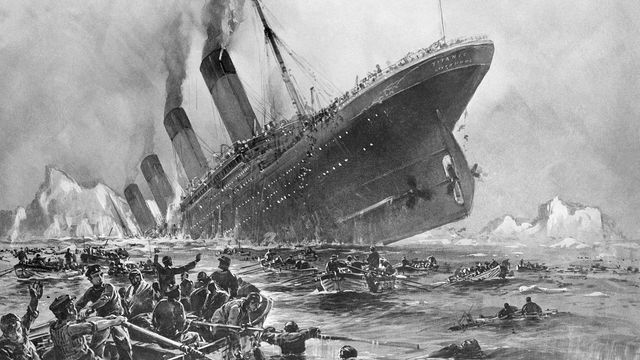

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Data-Science-CoderHouse/main/train.csv'
df = pd.read_csv(url, sep =",")



In [18]:
# muestra las columnas del df
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
# Observamos que tenemos 891 filas y 12 columnas
df.shape

(891, 12)

# **Datos**

**Veamos cada columna:**

**PassengerId:** Identificador de pasajero

**Survived**: 0 = No sobrevivió, 1 = sobrevivió

**Pclass:** Clase, donde 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.

**Sex:** Masculino o Femenino

**Age:** Edad en años, en fracción si es menor de 1

**SibSp:** Número de hermanos o cónyuges a bordo del titanic

**Parch:** Número de padres o hijos a bordo del titanic

**Ticket:** Número de ticket de pasajero

**Fare:** Tarifa de pasajero

**Cabin:** Número de cabina

**Embarked:** Punto de embarque, donde C = Cherbourg, Q = Queenstown, S = Southampton

In [20]:
#muestra las primeras 5 filas del df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
#muestra las últimas 5 filas del df
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [22]:

#observamos la cantidad de datos  por cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
df.describe(include='category')
# no tenemos variables que previamente reconozca como categóricas, eso hay que solucionarlo

ValueError: ignored

In [60]:
df['Sex'] = df['Sex'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Survived'] = df['Survived'].astype('category')
df.describe(include='category')

,Survived,Pclass,Sex
count,891,891,891
unique,2,3,2
top,0,3,male
freq,549,491,577


In [26]:

print("Cantidad inicial de personas", len(df["PassengerId"]))
df_sobrevive = df[df['Survived'] == 1]
print("Cantidad de personas que sobrevivieron", len(df_sobrevive))
print("Cantidad de personas que NO sobrevivieron", len(df["PassengerId"])-len(df_sobrevive))





Cantidad inicial de personas 891
Cantidad de personas que sobrevivieron 342
Cantidad de personas que NO sobrevivieron 549


In [27]:
#esto por numpy
data= np.unique(df.Pclass, return_counts=True)
data


(array([1, 2, 3]), array([216, 184, 491]))

In [28]:
df.Pclass.value_counts()
#acá por pandas

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [29]:
for i in range(3):
  print("Pasajeros que sobrevivieron en ", i+1, " clase: ", len(df[(df["Pclass"] ==1+i) & (df["Survived"]==1)]), " de un total de:", data[1][i])

Pasajeros que sobrevivieron en  1  clase:  136  de un total de: 216
Pasajeros que sobrevivieron en  2  clase:  87  de un total de: 184
Pasajeros que sobrevivieron en  3  clase:  119  de un total de: 491


# **Parece ser que la clase influyo en quienes primero fueron a los botes**

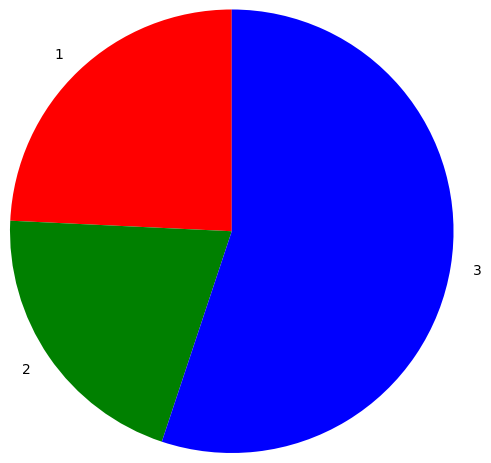

In [30]:
#Gráficas de pastel con Matplotlib

"""
Las gráficas de barras y/o pastel nos sirven para representar porcentajes y proporciones. En Python podemos utilizar la librería Matplotlib para desarrollar este tipo de gráficas.

Matplotlib dispone de la función pie, cuya sintaxis depende del grado de personalización y control que se requiera sobre la gráfica de pastel a dibujar.
"""

plt.pie(x=data[1], labels=data[0], colors=["Red","Green", "Blue"],startangle=90, radius=1.5)
plt.show()
#radius es el tamaño del circulo, angle es donde queremos que empiece el angulo

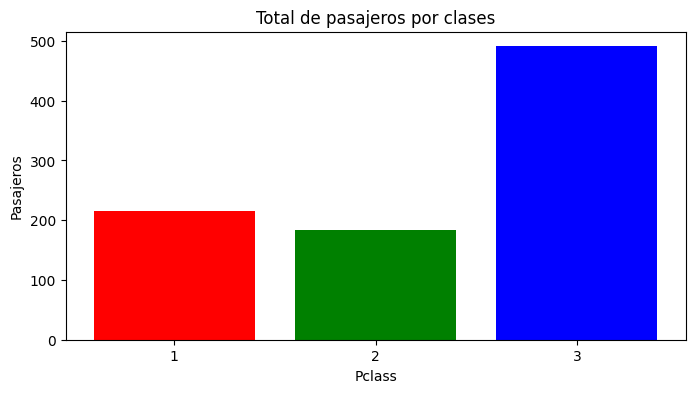

In [31]:
fig, ax = plt.subplots(figsize=(8,4),)
ax.bar( data[0], data[1],color=["Red","Green", "Blue"])
ax.set_title('Total de pasajeros por clases')
ax.set_ylabel('Pasajeros')
ax.set_xlabel('Pclass')

# Cambiar las etiquetas del eje x
ax.set_xticks([1, 2, 3])
plt.show()


In [ ]:
# Convert the gender variable to a numeric variable
df["gender"] = pd.to_numeric(df["gender"], errors="coerce")

<ipython-input-49-975ec1d10b39>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = "Pclass", y = "Survived", hue = "Embarked", ci = None,  data = df, palette= "mako", estimator=np.sum)


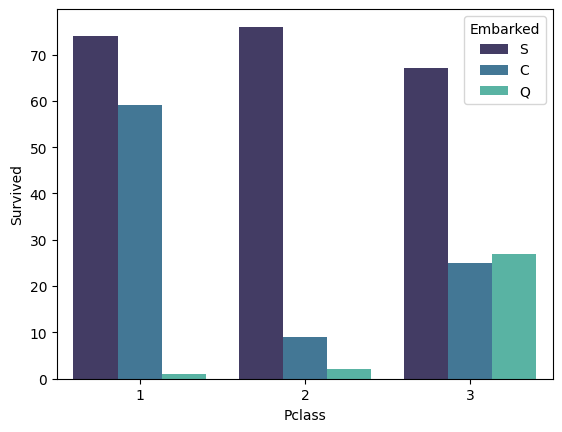

In [49]:
#Veamos en barras la proporción de personas que sobrevivieron segun las clases y el punto de salida.


sns.barplot(x = "Pclass", y = "Survived", hue = "Embarked", ci = None,  data = df, palette= "mako", estimator=np.sum)
plt.show()

In [50]:
sns.color_palette("tab10")
# https://seaborn.pydata.org/tutorial/color_palettes.html
#valido para los colores

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [51]:

#primer análisis, estámos ignorando las edades faltantes
#usamos filtros y contamos el  número de hombres y mujeres que habian en el barco


women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

print("Cantidad de mujeres:", len(women))
print("Cantidad de hombres", len(men))






Cantidad de mujeres: 314
Cantidad de hombres 577


Text(0.5, 1.0, 'Hombres')

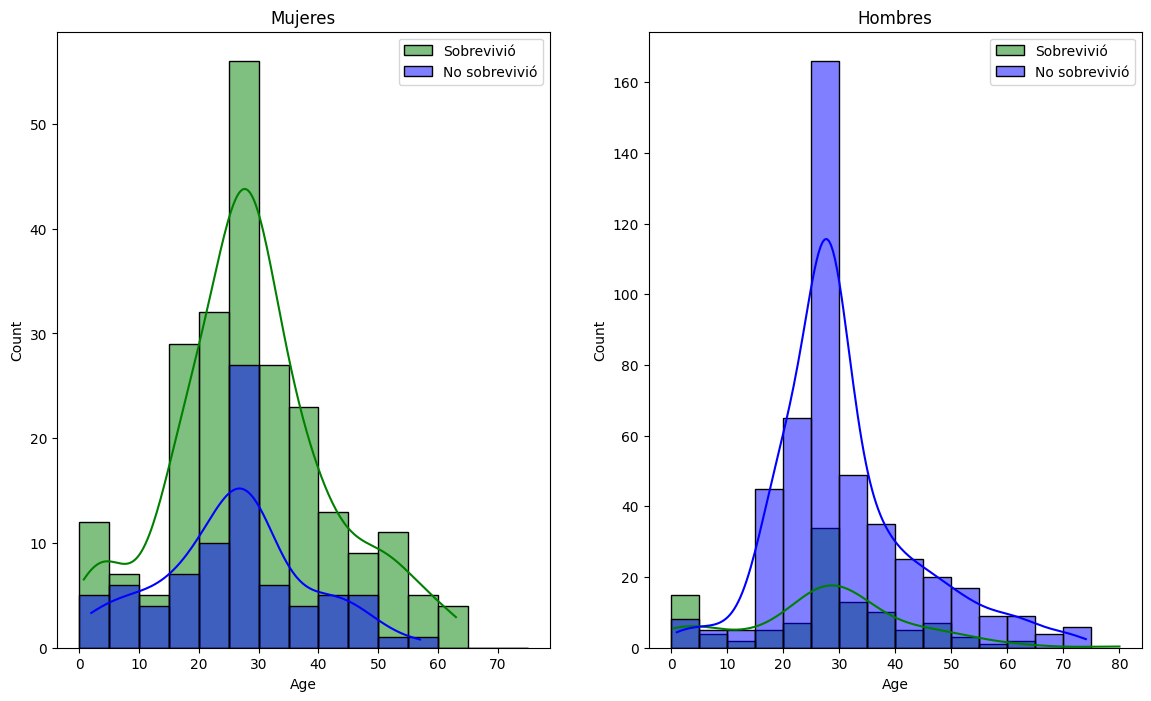

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 8))
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=np.arange(0, 80, 5), label = "Sobrevivió", color='g', ax = axes[0], kde =True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=np.arange(0, 80, 5), label = "No sobrevivió", color='b', ax = axes[0], kde = True)
ax.legend()
ax.set_title('Mujeres')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=np.arange(0, 80, 5), label = "Sobrevivió",  color='g',ax = axes[1], kde = True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=np.arange(0, 80, 5), label = "No sobrevivió",  color='b',ax = axes[1], kde = True)
ax.legend()
ax.set_title('Hombres')

In [65]:
# Hay muchos datos faltantes en edad, qué podemos hacer?
# La función pandas.isnull/isna detecta valores perdidos

df.isna().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [75]:
#podemos construir un df, que se llame edad y contenga los datos de las edades y luego obtener la media.
edad= df["Age"]
edad




0      22.00
1      38.00
2      26.00
3      35.00
4      35.00
       ...  
886    27.00
887    19.00
888    29.69
889    26.00
890    32.00
Name: Age, Length: 891, dtype: float64

In [76]:
# La función pandas.DataFrame.fillna() reemplaza los valores NaN en DataFrame con algún valor determinado.
# En nuestro caso usaremos el valor de la media
edad=edad.fillna(29.69)
# df["Age"]=df["Age"].fillna(29.69)





In [77]:
df = df.drop('Age', axis = 1) #elimino la columna Age del df original que contienen valores faltantes.
data_frame_final=pd.concat([df,edad], axis=1) #construyo un nuevo df con los valores de Age sin datos faltantes mediante la función pd.concat
data_frame_final

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.00
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.00
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.00
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.69
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.00


In [78]:
data_frame_final.isnull().sum().sort_values(ascending = False)
#podemos observar que datos faltantes en Age es igual a 0. Funcionó!!!

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Age              0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    object  
dtypes: category(3), float64(1), int64(3), object(4)
memory usage: 58.8+ KB


In [42]:
#ahora usemos sk-learn con simpleImputer
from sklearn.impute import SimpleImputer


#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Data-Science-CoderHouse/main/train.csv'
df = pd.read_csv(url, sep =",")


# Crear un objeto SimpleImputer con la estrategia de imputación 'median'
imputer = SimpleImputer(strategy='median')

# Seleccionar las columnas con valores faltantes
cols_with_missing_values = ["Age"]

# Imputar los valores faltantes con la mediana en las columnas seleccionadas
df[cols_with_missing_values] = imputer.fit_transform(df[cols_with_missing_values])

In [43]:
df.isnull().sum().sort_values(ascending = False)
#podemos observar que datos faltantes en Age es igual a 0. Funcionó de nuevo!!!

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [3]:
df_lluvias=pd.read_csv('/content/pune_1965_to_2002.csv', index_col=0)
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [4]:
#filtrar valores en un df
df_lluvias.iloc[0][2]

0.0

In [5]:
df_lluvias.loc[1965]

Jan      0.029
Feb      0.069
Mar      0.000
Apr     21.667
May     17.859
Jun    102.111
Jul    606.071
Aug    402.521
Sep     69.511
Oct      5.249
Nov     16.232
Dec     22.075
Name: 1965, dtype: float64

In [6]:
x= df_lluvias.index
y = df_lluvias.sum(axis='columns')


In [7]:
x

Int64Index([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
            1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002],
           dtype='int64', name='Year')

In [8]:
y

Year
1965    1263.394
1966     899.588
1967    1522.184
1968    1086.237
1969    1739.022
1970    1273.507
1971    1176.612
1972     710.475
1973    1570.073
1974    1425.876
1975    1777.838
1976    1941.167
1977    1202.154
1978    1168.583
1979    1769.187
1980    1268.185
1981    1562.761
1982     943.087
1983    1616.948
1984    1538.961
1985    1214.852
1986    1267.969
1987    1197.999
1988    1822.649
1989    1400.024
1990    1766.294
1991    1497.256
1992    1323.883
1993    1210.252
1994    1987.689
1995    1209.068
1996    1631.331
1997    1844.840
1998    1603.243
1999    1235.683
2000    1094.062
2001    1045.825
2002    1024.881
dtype: float64

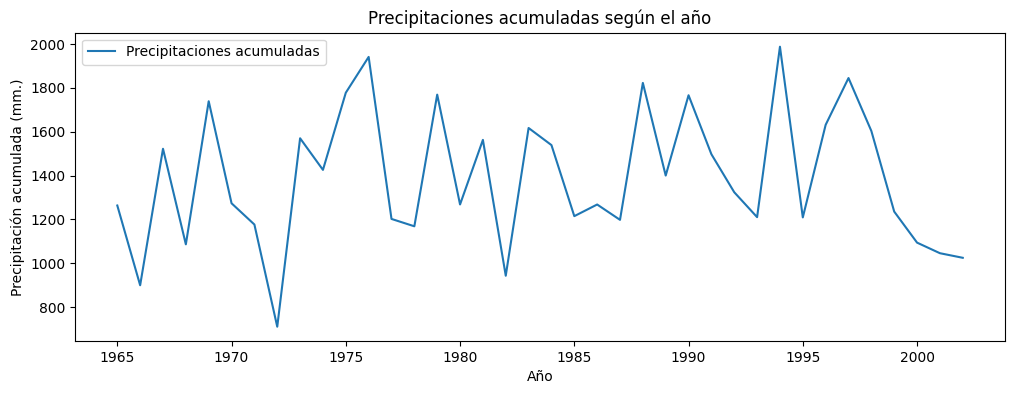

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend()
#probar ax.legend(loc='lower left')


KeyError: ignored

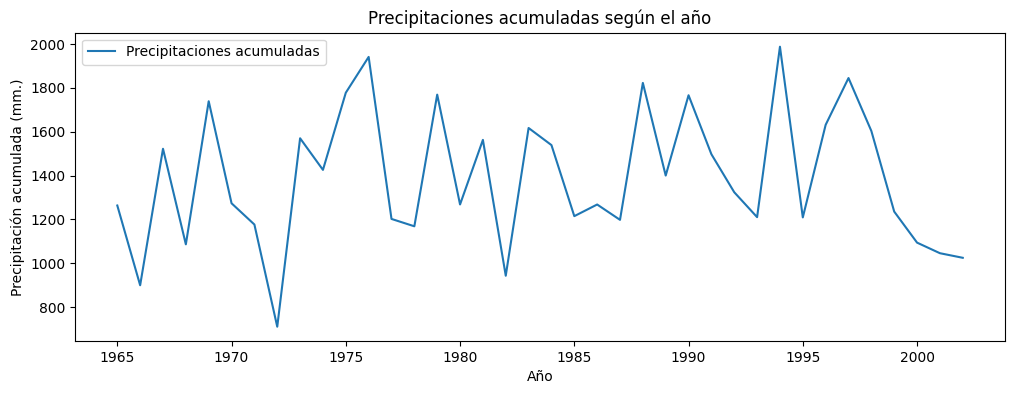

In [22]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend()

for i, label in enumerate(x):
    plt.annotate(label, (x[i], y[i]))




In [17]:
y[0]
#y.loc[1965]

KeyError: ignored

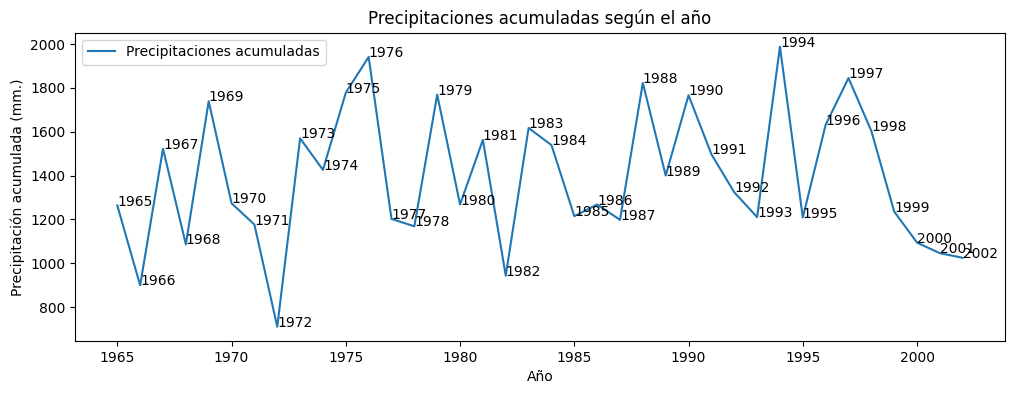

In [100]:
#y=y.tolist()

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend()

for i, label in enumerate(x):
    plt.annotate((int(round(label,0))), (x[i], y[i]))

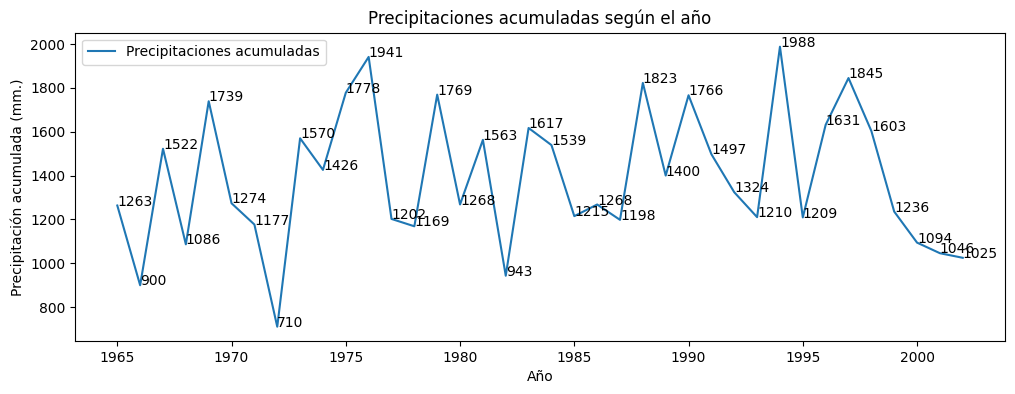

In [95]:
y = df_lluvias.sum(axis='columns')
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_xlabel('Año')
ax.set_ylabel('Precipitación acumulada (mm.)')
ax.set_title('Precipitaciones acumuladas según el año')
ax.legend()

for i, label in enumerate(y):
    plt.annotate((int(round(label,0))), (x[i], y.iloc[i]))